In [ ]:
from utils.functions import import_inputs_evaluation
from utils.functions import import_inputs_industrial_process
df = import_inputs_evaluation()
df[:10]

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

def impute_knn_with_zeros(df, n_neighbors=5):
    """
    Impute les valeurs manquantes (NaN ou null) et les valeurs nulles dans un DataFrame en utilisant la méthode k-NN,
    en remplaçant ces valeurs par les valeurs des observations les plus similaires.

    Args:
        df (pandas.DataFrame): Le DataFrame contenant les données à imputer.
        n_neighbors (int): Le nombre de voisins à utiliser pour l'imputation.
            Par défaut, n_neighbors=5.

    Returns:
        pandas.DataFrame: Le DataFrame avec les valeurs imputées.
    """
    # Remplacer les valeurs nulles par NaN pour inclure dans l'imputation
    #df_nan = df.replace(0, pd.NA)

    # Création de l'imputeur k-NN
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Imputation des valeurs manquantes et des valeurs nulles
    imputed_data = imputer.fit_transform(df)

    return pd.DataFrame(imputed_data, columns=df.columns, index=df.index)

# Exemple de DataFrame avec des valeurs manquantes, des valeurs nulles et d'autres valeurs


# Imputation des valeurs manquantes et des valeurs nulles en utilisant la méthode k-NN
imputed_df = impute_knn_with_zeros(df)

# Afficher le DataFrame avec les données imputées
print("DataFrame avec les valeurs imputées par la méthode k-NN en remplaçant les valeurs manquantes et nulles :\n", imputed_df)

df=imputed_df


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assurez-vous que votre dataset est chargé dans une variable DataFrame, par exemple 'df'

# Calculez les limites inférieure et supérieure de l'IQR pour chaque colonne numérique
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Créez un DataFrame pour stocker les résultats
outliers_df = pd.DataFrame(index=df.index, columns=df.columns)
outliers_df.fillna(False, inplace=True)

# Identifiez les outliers pour chaque colonne numérique
for col in df.select_dtypes(include=[np.number]).columns:
    outliers_df[col] = np.where((df[col] < lower_limit[col]) | (df[col] > upper_limit[col]), True, False)

# Affichez le nombre d'outliers par colonne
print(outliers_df.sum())

In [ ]:
import pandas as pd

def replace_outliers_with_median(df, threshold=1.5):
    """
    Remplace les valeurs aberrantes dans un DataFrame par la médiane des valeurs de la même colonne.

    Args:
        df (pandas.DataFrame): Le DataFrame contenant les données.
        threshold (float): Le seuil multiplicatif pour déterminer les outliers.
            Par défaut, threshold=1.5.

    Returns:
        pandas.DataFrame: Le DataFrame avec les valeurs aberrantes remplacées par la médiane.
    """
    # Calculer les quartiles Q1 et Q3
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Calculer l'écart interquartile (IQR)
    IQR = Q3 - Q1

    # Déterminer les limites supérieure et inférieure pour les outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Remplacer les valeurs aberrantes par la médiane de chaque colonne
    df_no_outliers = df.copy()
    for col in df.columns:
        df_no_outliers[col] = df[col].where((df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col]), df[col].median())

    return df_no_outliers

# Remplacer les outliers par la médiane de chaque colonne
df_no_outliers = replace_outliers_with_median(df)

# Afficher le DataFrame avec les outliers remplacés par la médiane
print("DataFrame avec les outliers remplacés par la médiane :\n", df_no_outliers)

df=df_no_outliers


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('dataset_anonymized/evaluation/conc3.csv')
# Matrice de corrélation
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

# Pairplot
sns.pairplot(df)
plt.show()


In [ ]:
"""
# Charger les trois fichiers CSV
df1 = df
df3 = pd.read_csv('dataset_anonymized/evaluation/class.csv')
df2 = pd.read_csv('dataset_anonymized/evaluation/grades.csv')

# Concaténer les trois DataFrames
concatenated_df = pd.concat([df1, df2, df3], axis=1)

# Afficher les premières lignes du DataFrame concaténé

print(concatenated_df.head())

# Enregistrer le DataFrame concaténé dans un nouveau fichier CSV
concatenated_df.to_csv('dataset_anonymized/evaluation/conc3.csv', index=False)"""

In [ ]:
df = pd.read_csv('dataset_anonymized/evaluation/conc3.csv')

df.head()

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Charger les données


df = df.dropna(subset=['y_2'])
X_label = df.drop(['y_2','y_1'], axis=1)  # features pour prédire label
y_label = df['y_2']  # cible label

# Diviser les données en ensembles d'entraînement et de test
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_label, y_label, test_size=0.99, random_state=42)

model_l = XGBClassifier()

# Entraîner les modèles
model_l.fit(X_train_l, y_train_l)



In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred_l = model_l.predict(X_test_l)

#  Calculer le F1-score
f1_score_l = f1_score(y_test_l, y_pred_l, average='weighted')

print("F1-score pour la prédiction de label:", f1_score_l)


In [ ]:
sum(y_label)/len(y_label)*100

In [363]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

df = df.dropna(subset=['y_2'])
X = df.drop(['x_0','x_2','x_3','x_5','x_7','x_8','x_9','x_10','y_2','y_1'], axis=1)  # features pour prédire label
y = df['y_2']  # cible label
# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.9, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train, y_train = X_train_resampled, y_train_resampled
# Initialiser le modèle XGBoost avec des paramètres de régularisation
model = xgb.XGBClassifier(
    max_depth=3,
    learning_rate=0.01,
    n_estimators=20,
    subsample=0.3,
    reg_alpha=0.9,
    reg_lambda=0.9,
    random_state=42,
    scale_pos_weight=3
)

# Entraîner le modèle avec validation croisée et arrêt anticipé
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(
    X_train, y_train,
    eval_metric=["error", "logloss"],
    eval_set=eval_set,
    early_stopping_rounds=10,
    verbose=True
)

# Faire des prédictions sur l'ensemble de validation
y_pred = model.predict(X_val)

# Calculer l'accuracy
accuracy = f1_score(y_val, y_pred)
print("Accuracy:", accuracy)


[0]	validation_0-error:0.50000	validation_0-logloss:0.79992	validation_1-error:0.74267	validation_1-logloss:1.03832
[1]	validation_0-error:0.50000	validation_0-logloss:0.78767	validation_1-error:0.74267	validation_1-logloss:1.02164
[2]	validation_0-error:0.50000	validation_0-logloss:0.77548	validation_1-error:0.74267	validation_1-logloss:1.00513
[3]	validation_0-error:0.50000	validation_0-logloss:0.76380	validation_1-error:0.74267	validation_1-logloss:0.98964
[4]	validation_0-error:0.50000	validation_0-logloss:0.75245	validation_1-error:0.74267	validation_1-logloss:0.97438
[5]	validation_0-error:0.50000	validation_0-logloss:0.74125	validation_1-error:0.74267	validation_1-logloss:0.95916
[6]	validation_0-error:0.50000	validation_0-logloss:0.73060	validation_1-error:0.74267	validation_1-logloss:0.94515
[7]	validation_0-error:0.50000	validation_0-logloss:0.71955	validation_1-error:0.74267	validation_1-logloss:0.93047
[8]	validation_0-error:0.50000	validation_0-logloss:0.70883	validation_1

c:\Users\adamy\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\adamy\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


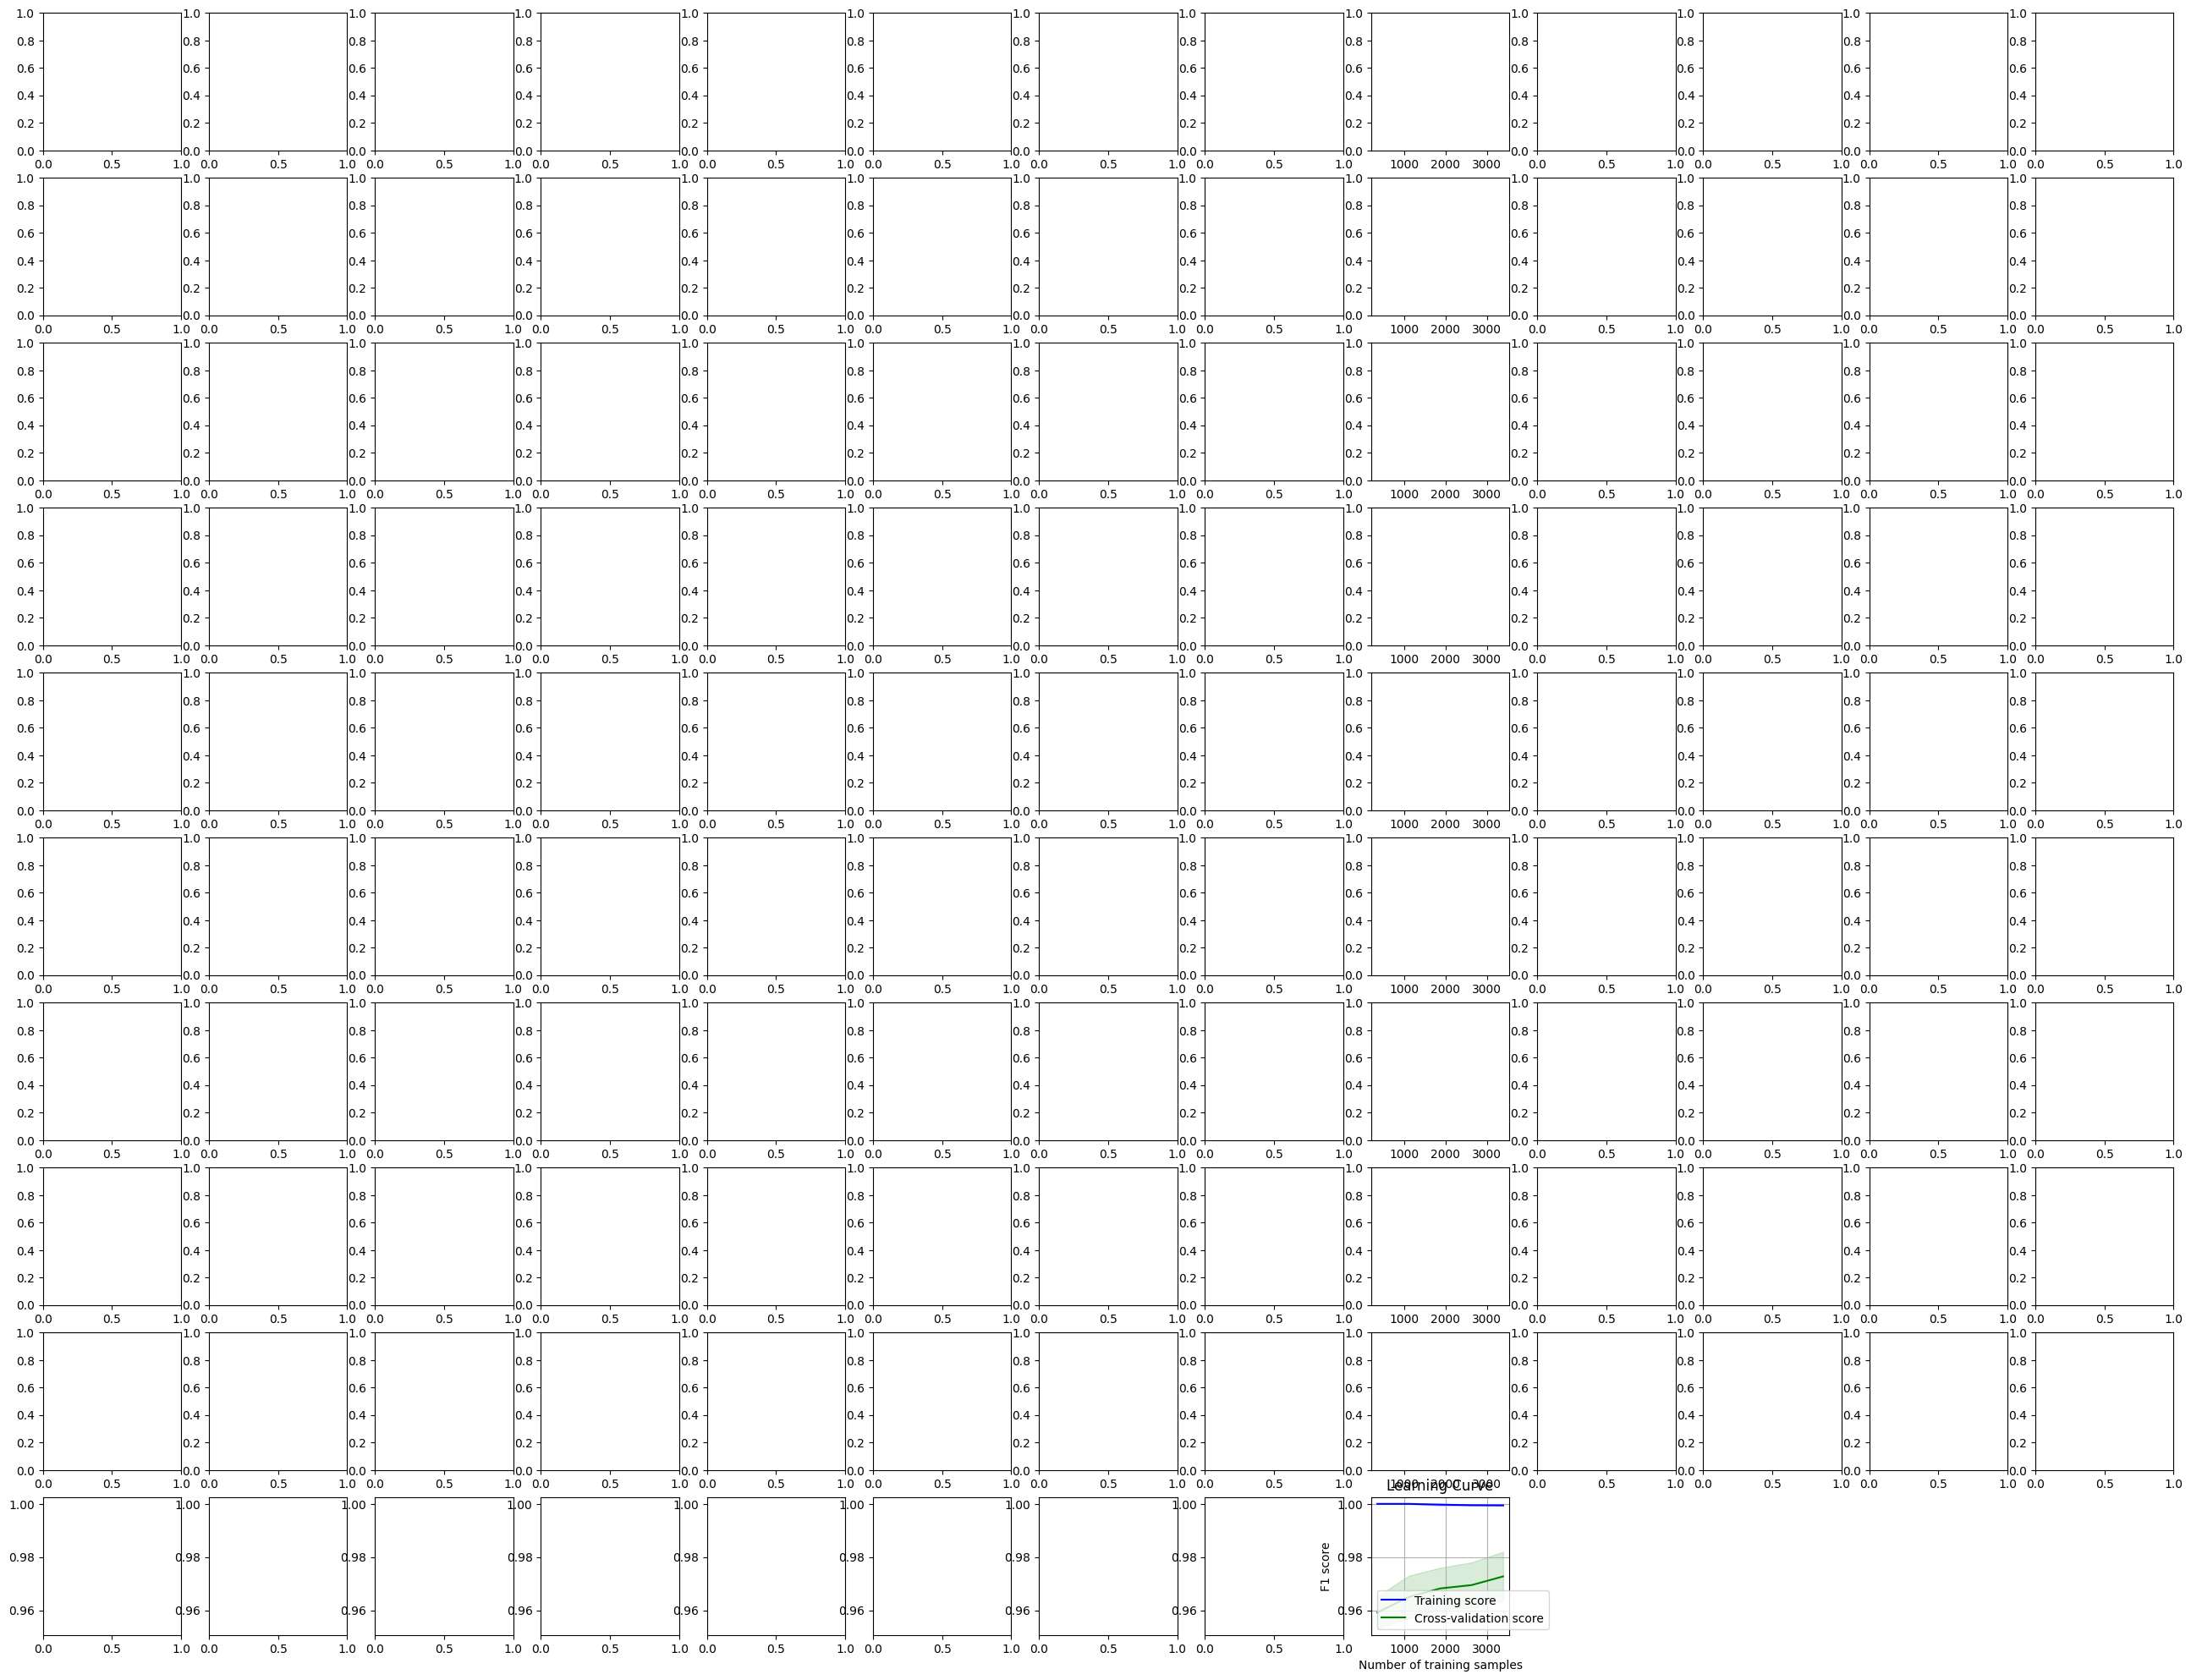

In [365]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

# Charger les données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le modèle XGBoost
clf = XGBClassifier()

# Calculer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1)

# Calculer la moyenne et l'écart-type des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.legend(loc='best')
plt.xlabel('Number of training samples')
plt.ylabel('F1 score')
plt.title('Learning Curve')
plt.grid()
plt.show()


In [362]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('dataset_anonymized/evaluation/conc3.csv')

df = df.dropna(subset=['y_2'])
X = df.drop(['x_0','x_2','x_3','x_5','x_7','x_8','x_9','x_10','y_2','y_1'], axis=1)  # features pour prédire label
y = df['y_2']  # cible label
from sklearn.model_selection import train_test_split, GridSearchCV

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle Random Forest avec des paramètres par défaut
model = RandomForestClassifier(random_state=42)

# Utiliser la validation croisée pour optimiser les hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Sélectionner le meilleur modèle
best_model = grid_search.best_estimator_

# Entraîner le meilleur modèle sur l'ensemble d'entraînement
best_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Calculer l'accuracy
accuracy = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)



c:\Users\adamy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adamy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adamy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\adamy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

Accuracy: 0.9571183533447685


In [366]:
df = df.dropna(subset=['y_2'])
X = df.drop(['x_0','x_2','x_3','x_5','x_7','x_8','x_9','x_10','y_2','y_1'], axis=1)  # features pour prédire label
y = df['y_2']  # cible label
X

,x_1,x_4,x_6
0,0.30,0.076,34.0
1,0.30,0.098,67.0
2,0.30,0.092,54.0
3,0.28,0.075,60.0
4,0.66,0.075,40.0
...,...,...,...
5311,0.21,0.039,92.0
5312,0.32,0.047,168.0
5313,0.24,0.041,111.0
5314,0.29,0.022,110.0
